In [ ]:
import pandas as pd

file_path = '/content/EU-park.csv'
data = pd.read_csv(file_path)

data.head()


<ipython-input-1-77d90a2a707e>:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Date,DayOfWeek,Hour,Attraction,WaitTime,Temperature,Rain
0,2020-01-01,Wednesday,0,Wadon,5.0,8.745401,False
1,2020-01-01,Wednesday,0,Fjord Fun,5.0,8.745401,False
2,2020-01-01,Wednesday,0,Neptun,5.0,8.745401,False
3,2020-01-01,Wednesday,0,Gold Star,5.0,8.745401,False
4,2020-01-01,Wednesday,0,Green Fire,5.0,8.745401,False


#**Exploratory Data Analysis**

In [ ]:
# Summary statistics for numerical columns
numerical_summary = data.describe()

# Check for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

numerical_summary, missing_values, data_types


(                Hour       WaitTime    Temperature
 count  253732.000000  253732.000000  253732.000000
 mean       11.498305      33.848040      12.363560
 std         6.922572     191.949578       5.209532
 min         0.000000     -10.000000       5.009368
 25%         5.000000       5.000000       8.213851
 50%        11.000000      18.000000      11.435003
 75%        17.000000      35.000000      14.909958
 max        23.000000   20021.472740      24.986725,
 Date           0
 DayOfWeek      0
 Hour           0
 Attraction     0
 WaitTime       0
 Temperature    0
 Rain           1
 dtype: int64,
 Date            object
 DayOfWeek       object
 Hour             int64
 Attraction      object
 WaitTime       float64
 Temperature    float64
 Rain            object
 dtype: object)

The average waiting time is about 33.85 minutes, but there's a large standard deviation, indicating significant variability. The maximum value is unusually high (over 20,000 minutes), suggesting potential outliers or errors.

In [ ]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Examine the distribution of 'WaitTime' and 'Temperature'
waittime_distribution = data['WaitTime'].describe()
temperature_distribution = data['Temperature'].describe()

waittime_distribution, temperature_distribution


(count    253732.000000
 mean         33.848040
 std         191.949578
 min         -10.000000
 25%           5.000000
 50%          18.000000
 75%          35.000000
 max       20021.472740
 Name: WaitTime, dtype: float64,
 count    253732.000000
 mean         12.363560
 std           5.209532
 min           5.009368
 25%           8.213851
 50%          11.435003
 75%          14.909958
 max          24.986725
 Name: Temperature, dtype: float64)

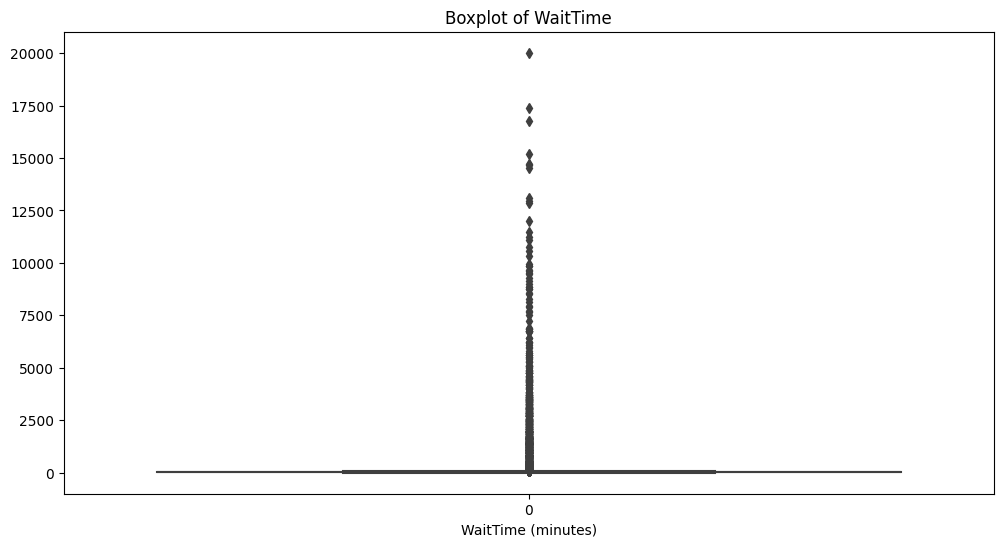

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Investigating outliers in 'WaitTime'
plt.figure(figsize=(12, 6))
sns.boxplot(data['WaitTime'])
plt.title('Boxplot of WaitTime')
plt.xlabel('WaitTime (minutes)')
plt.show()


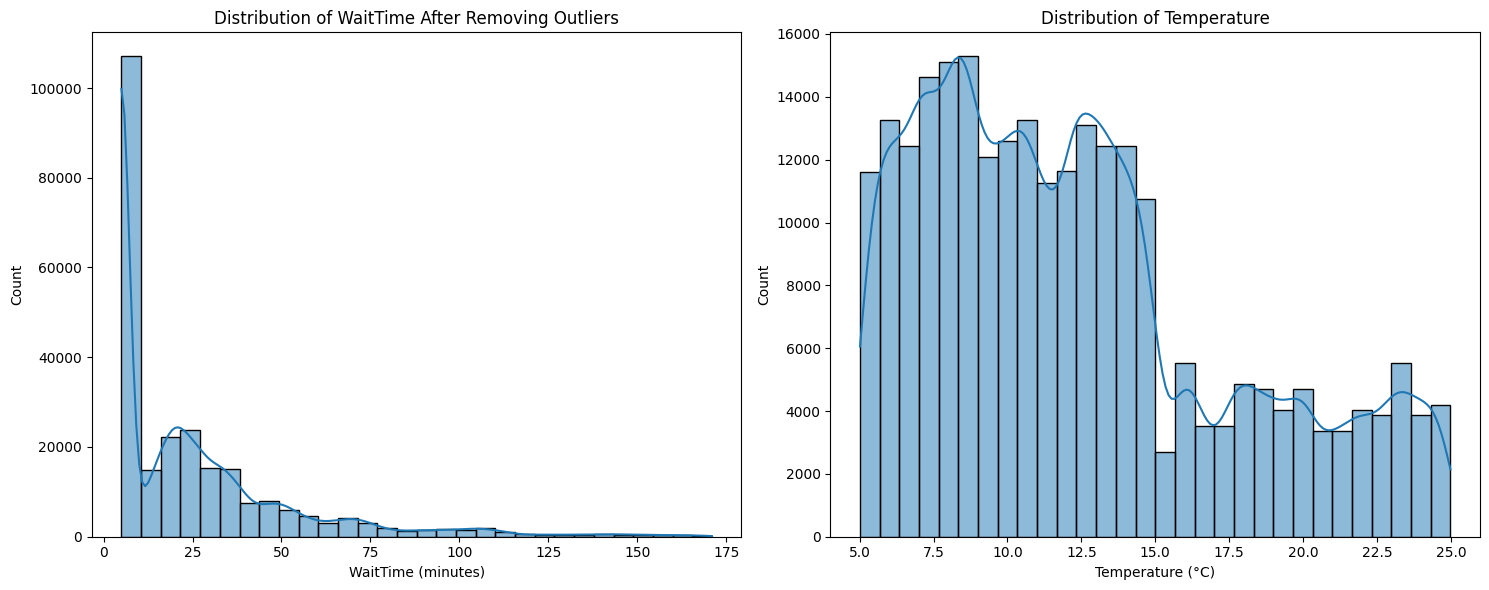

In [ ]:
# Calculate the 1st and 99th percentiles of 'WaitTime'
percentile_1 = data['WaitTime'].quantile(0.01)
percentile_99 = data['WaitTime'].quantile(0.99)

# Remove outliers
data_filtered = data[(data['WaitTime'] >= percentile_1) & (data['WaitTime'] <= percentile_99)]

# Visualize the distributions again
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_filtered['WaitTime'], bins=30, kde=True)
plt.title('Distribution of WaitTime After Removing Outliers')
plt.xlabel('WaitTime (minutes)')

plt.subplot(1, 2, 2)
sns.histplot(data['Temperature'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')

plt.tight_layout()
plt.show()


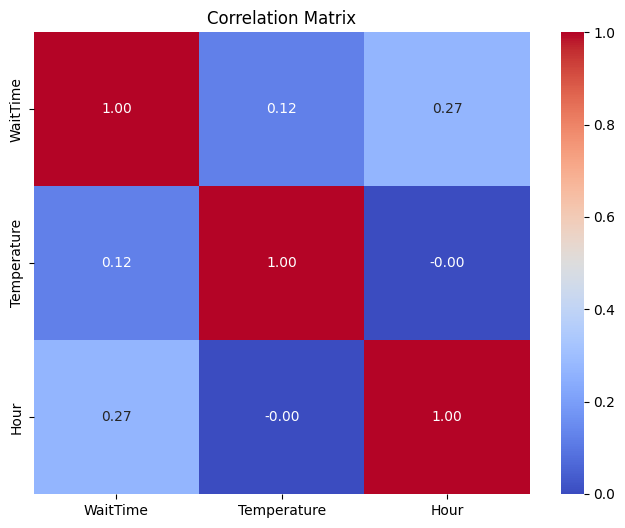

In [ ]:
# Correlation analysis
correlation_matrix = data_filtered[['WaitTime', 'Temperature', 'Hour']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


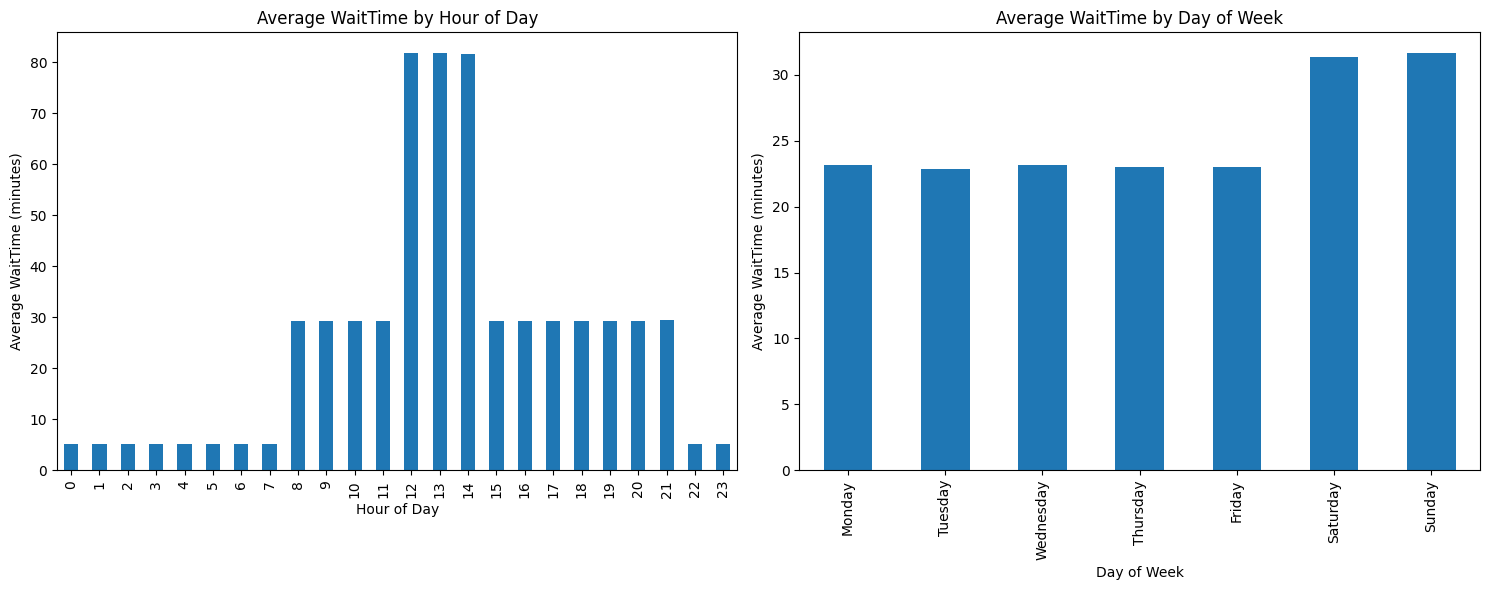

In [ ]:
# Temporal trends analysis

# Hourly trend
hourly_trend = data_filtered.groupby('Hour')['WaitTime'].mean()

# Day of the week trend
day_of_week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week_trend = data_filtered.groupby('DayOfWeek')['WaitTime'].mean().reindex(day_of_week_order)

# Visualizing the trends
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
hourly_trend.plot(kind='bar')
plt.title('Average WaitTime by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average WaitTime (minutes)')

plt.subplot(1, 2, 2)
day_of_week_trend.plot(kind='bar')
plt.title('Average WaitTime by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average WaitTime (minutes)')

plt.tight_layout()
plt.show()


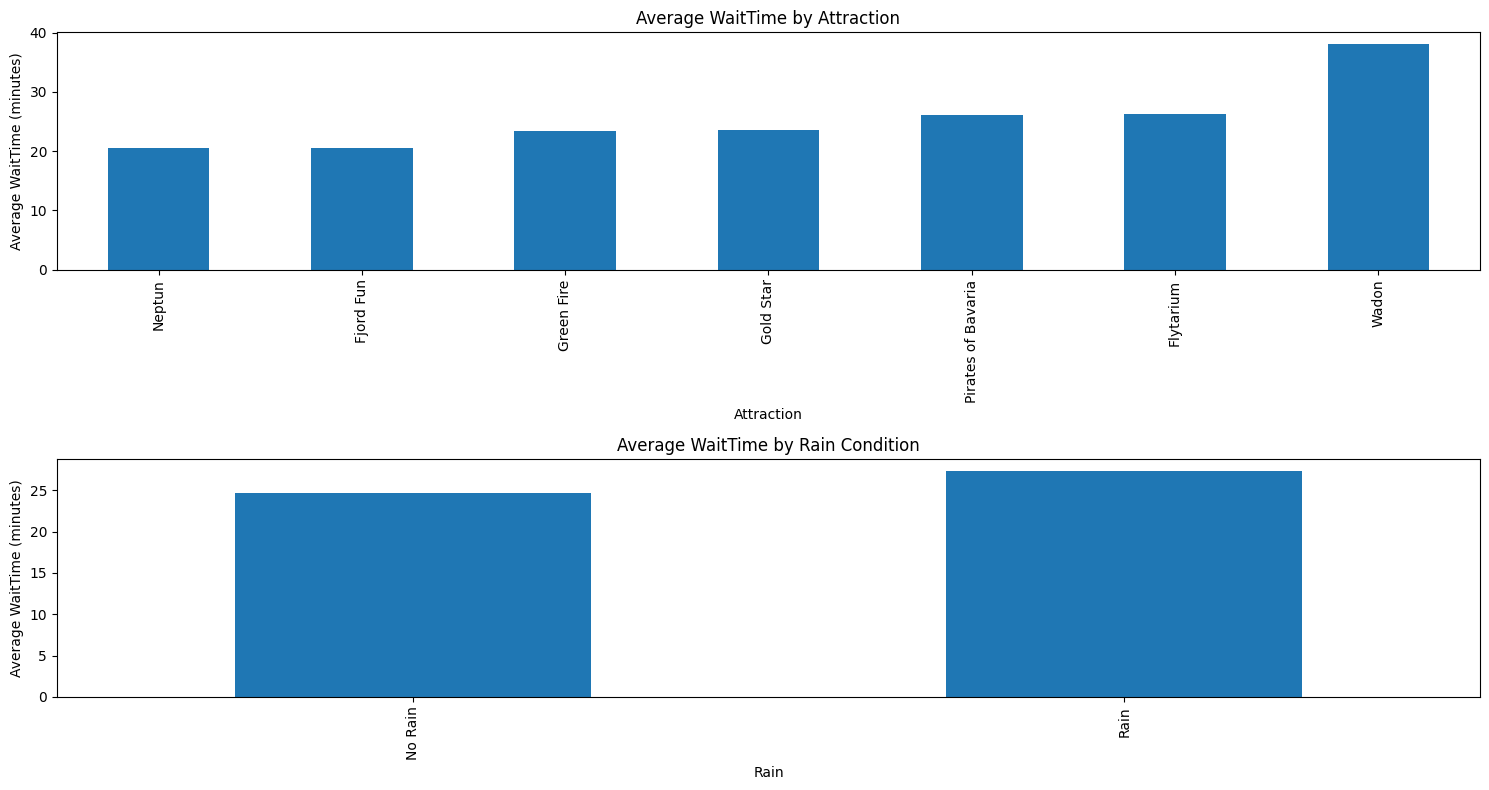

In [ ]:
# Categorical analysis for 'Attraction' and 'Rain'

# Impact of Attraction on WaitTime
attraction_impact = data_filtered.groupby('Attraction')['WaitTime'].mean().sort_values()

# Impact of Rain on WaitTime
rain_impact = data_filtered.groupby('Rain')['WaitTime'].mean()

# Visualizing the impact
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
attraction_impact.plot(kind='bar')
plt.title('Average WaitTime by Attraction')
plt.xlabel('Attraction')
plt.ylabel('Average WaitTime (minutes)')

plt.subplot(2, 1, 2)
rain_impact.plot(kind='bar')
plt.title('Average WaitTime by Rain Condition')
plt.xlabel('Rain')
plt.ylabel('Average WaitTime (minutes)')
plt.xticks([0, 1], ['No Rain', 'Rain'])

plt.tight_layout()
plt.show()


#**Data Preprocessing and Feature Engineering**

In [ ]:
# Re-importing necessary libraries after code execution state reset
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Reload the dataset
file_path = '/content/EU-park.csv'
data = pd.read_csv(file_path)

# Remove outliers based on previously determined percentiles
percentile_1 = data['WaitTime'].quantile(0.01)
percentile_99 = data['WaitTime'].quantile(0.99)
data_filtered = data[(data['WaitTime'] >= percentile_1) & (data['WaitTime'] <= percentile_99)]

# Convert 'Date' to datetime and create time-based features
data_filtered['Date'] = pd.to_datetime(data_filtered['Date'])
data_filtered['Month'] = data_filtered['Date'].dt.month
data_filtered['Day'] = data_filtered['Date'].dt.day

# Preprocessing steps

# 1. Encode Categorical Variables
categorical_features = ['DayOfWeek', 'Attraction', 'Rain']
one_hot_encoder = OneHotEncoder(sparse=False)

# 2. Create Time-based Features (if applicable)
time_based_features = ['Month', 'Day']

# 3. Normalize/Standardize Numerical Features
numerical_features = ['Temperature', 'Hour']
scaler = StandardScaler()

# Combined preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', one_hot_encoder, categorical_features)
    ])

# Applying the transformations
X = data_filtered[numerical_features + categorical_features + time_based_features]
y = data_filtered['WaitTime']
X_transformed = preprocessor.fit_transform(X)

# 4. Check for Missing Values (re-verification)
missing_values_check = X.isnull().sum()

# 5. Split Data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

missing_values_check, X_train.shape, X_test.shape


<ipython-input-10-a247868bdc50>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Date'] = pd.to_datetime(data_filtered['Date'])
<ipython-input-10-a247868bdc50>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Month'] = data_filtered['Date'].dt.month
<ipython-input-10-a247868bdc50>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

(Temperature    0
 Hour           0
 DayOfWeek      0
 Attraction     0
 Rain           0
 Month          0
 Day            0
 dtype: int64,
 (238127, 18),
 (59532, 18))

# **Model Development**

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Training the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature Importance
feature_importances = rf_model.feature_importances_

# Preparing feature names after one-hot encoding
feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_names.extend(numerical_features)
feature_names.extend(time_based_features)

# Mapping feature importances with their names
feature_importance_dict = dict(zip(feature_names, feature_importances))

rmse, mae, r2, feature_importance_dict



(7.33525387044129,
 3.70572914282657,
 0.9316693647223396,
 {'DayOfWeek_Friday': 0.08783857043262218,
  'DayOfWeek_Monday': 0.7258490233933869,
  'DayOfWeek_Saturday': 0.0006801308427860385,
  'DayOfWeek_Sunday': 0.0006834288485889535,
  'DayOfWeek_Thursday': 0.028264878136418852,
  'DayOfWeek_Tuesday': 0.026365194312336672,
  'DayOfWeek_Wednesday': 0.0006511115210800236,
  'Attraction_Fjord Fun': 0.0006669947114184041,
  'Attraction_Flytarium': 0.0006920683081503762,
  'Attraction_Gold Star': 0.005526497417242374,
  'Attraction_Green Fire': 0.009150624428791238,
  'Attraction_Neptun': 0.001416134928849783,
  'Attraction_Pirates of Bavaria': 0.0013089361180246622,
  'Attraction_Wadon': 0.005635498669650567,
  'Rain_False': 0.009391483801811847,
  'Rain_True': 0.08270850577783348,
  'Temperature': 0.006334593530087419,
  'Hour': 0.006836324820920066})

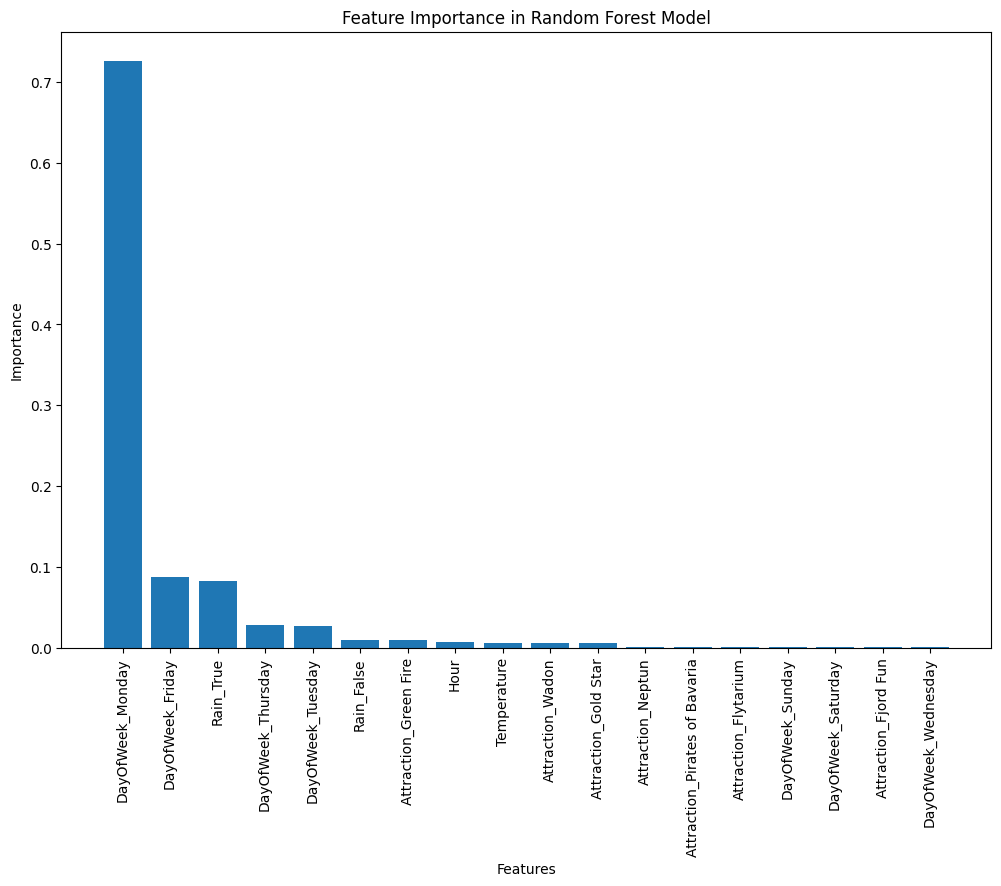

In [ ]:
import matplotlib.pyplot as plt

# Feature Importance from the results
feature_importance_dict = {
    'DayOfWeek_Friday': 0.08783857043262218, 'DayOfWeek_Monday': 0.7258490233933869,
    'DayOfWeek_Saturday': 0.0006801308427860385, 'DayOfWeek_Sunday': 0.0006834288485889535,
    'DayOfWeek_Thursday': 0.028264878136418852, 'DayOfWeek_Tuesday': 0.026365194312336672,
    'DayOfWeek_Wednesday': 0.0006511115210800236, 'Attraction_Fjord Fun': 0.0006669947114184041,
    'Attraction_Flytarium': 0.0006920683081503762, 'Attraction_Gold Star': 0.005526497417242374,
    'Attraction_Green Fire': 0.009150624428791238, 'Attraction_Neptun': 0.001416134928849783,
    'Attraction_Pirates of Bavaria': 0.0013089361180246622, 'Attraction_Wadon': 0.005635498669650567,
    'Rain_False': 0.009391483801811847, 'Rain_True': 0.08270850577783348,
    'Temperature': 0.006334593530087419, 'Hour': 0.006836324820920066
}

# Sorting the features based on importance
sorted_feature_importances = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Creating a bar chart for feature importance
plt.figure(figsize=(12, 8))
plt.bar(range(len(sorted_feature_importances)), list(sorted_feature_importances.values()), align='center')
plt.xticks(range(len(sorted_feature_importances)), list(sorted_feature_importances.keys()), rotation='vertical')
plt.title('Feature Importance in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


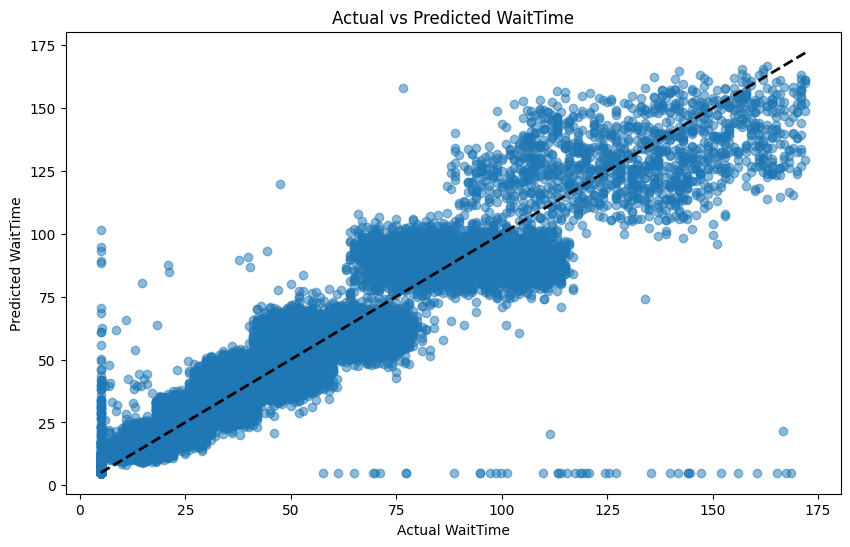

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual WaitTime')
plt.ylabel('Predicted WaitTime')
plt.title('Actual vs Predicted WaitTime')
plt.show()


## ARIMA Model

In [ ]:
data_filtered['Date'] = pd.to_datetime(data_filtered['Date'])
data_time_series = data_filtered.set_index('Date')

# Resample the data to get daily averages
data_daily = data_time_series['WaitTime'].resample('D').mean()

from statsmodels.tsa.stattools import adfuller

result = adfuller(data_daily.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If p-value > 0.05, the series is not stationary and differencing may be needed


<ipython-input-14-324c120c879f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Date'] = pd.to_datetime(data_filtered['Date'])


ADF Statistic: -3.766054
p-value: 0.003274


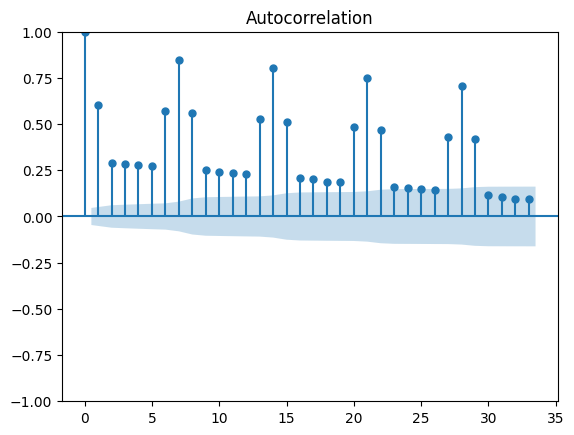

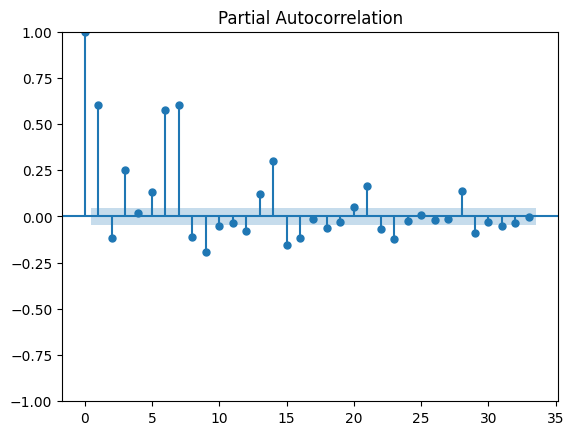

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(data_daily.dropna())
plot_pacf(data_daily.dropna())
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Example: ARIMA with p=1, d=1, q=1
model = ARIMA(data_daily, order=(1, 1, 1))
model_fit = model.fit()


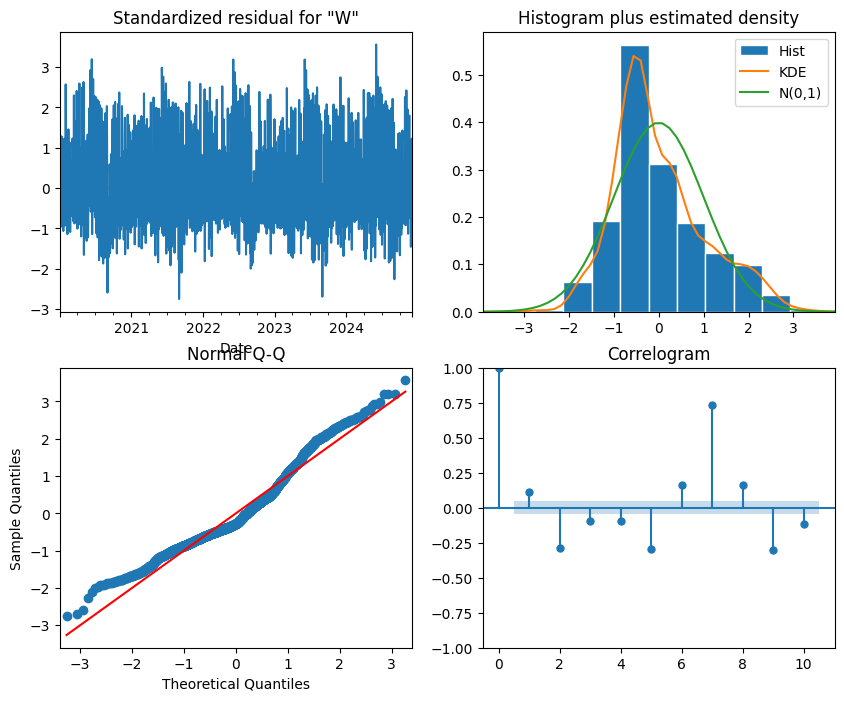

In [ ]:
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()


<ipython-input-18-05ba3c615117>:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=data_daily.index[-1], periods=forecast_steps + 1, closed='right')


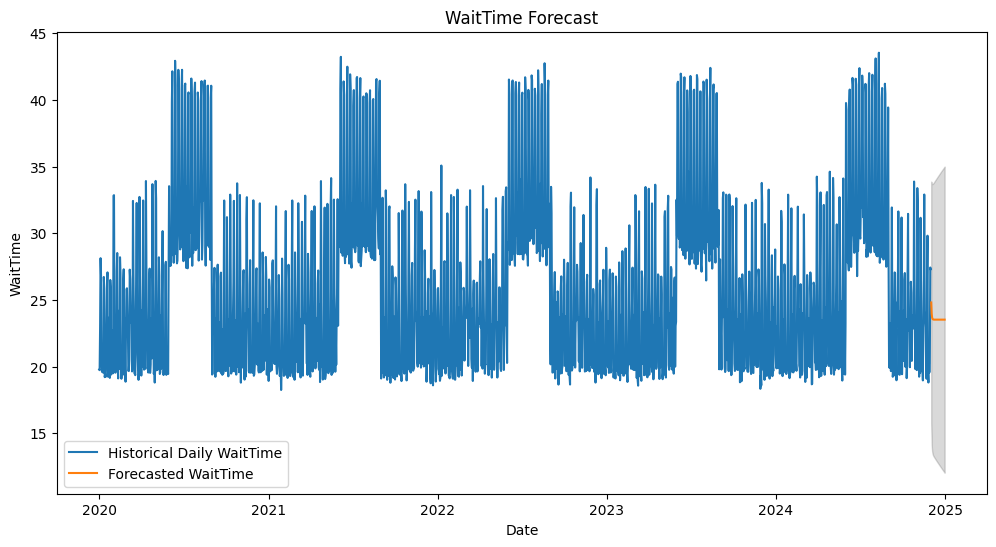

In [ ]:
# Forecasting future values
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data_daily.index[-1], periods=forecast_steps + 1, closed='right')
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotting the forecast along with the historical data
plt.figure(figsize=(12, 6))
plt.plot(data_daily.index, data_daily, label='Historical Daily WaitTime')
plt.plot(forecast_index, forecast_mean, label='Forecasted WaitTime')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='k', alpha=.15)
plt.title('WaitTime Forecast')
plt.xlabel('Date')
plt.ylabel('WaitTime')
plt.legend()
plt.show()


In [ ]:

import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

p = d = q = range(0, 6)
pdq = list(itertools.product(p, d, q))

warnings.filterwarnings("ignore")  # Ignore convergence warnings

for param in pdq:
    try:
        model_arima = ARIMA(data_daily, order=param)
        model_arima_fit = model_arima.fit()
        print('ARIMA{} - AIC:{}'.format(param, model_arima_fit.aic))
    except:
        continue


ARIMA(0, 0, 0) - AIC:11611.74937538214
ARIMA(0, 0, 1) - AIC:10824.571702214247
ARIMA(0, 0, 2) - AIC:10749.326664344902
ARIMA(0, 0, 3) - AIC:10750.999052252817
ARIMA(0, 0, 4) - AIC:10633.564971716234
ARIMA(0, 0, 5) - AIC:10593.788213600195
ARIMA(0, 1, 0) - AIC:11180.864710469166
ARIMA(0, 1, 1) - AIC:10793.653480013927
ARIMA(0, 1, 2) - AIC:10439.284813834885
ARIMA(0, 1, 3) - AIC:10430.636414246475
ARIMA(0, 1, 4) - AIC:10217.6586163842
ARIMA(0, 1, 5) - AIC:10213.907322619838
ARIMA(0, 2, 0) - AIC:12596.682728516995
ARIMA(0, 2, 1) - AIC:11185.23092479289
ARIMA(0, 2, 2) - AIC:10802.39269985655
ARIMA(0, 2, 3) - AIC:10452.572222022942
ARIMA(0, 2, 4) - AIC:10446.04842915232
ARIMA(0, 2, 5) - AIC:10225.654011410117
ARIMA(0, 3, 0) - AIC:14401.240534018114
ARIMA(0, 3, 1) - AIC:12600.208414656672
ARIMA(0, 3, 2) - AIC:11242.419597205284
ARIMA(0, 3, 3) - AIC:10835.528470990008
ARIMA(0, 3, 4) - AIC:10469.690245984853
ARIMA(0, 3, 5) - AIC:10465.251671857122
ARIMA(0, 4, 0) - AIC:16393.998390984852
ARIMA(

After running the above code, we found that (5,0,5) has the lowest AIC value and thus give the best result out of the model.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# Split the data into training and testing sets
train = data_daily.iloc[:-30]
test = data_daily.iloc[-30:]

# Fit the ARIMA model (using previously identified optimal parameters)
model = ARIMA(train, order=(5, 0, 5))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, forecast))

# Calculate MAE
mae = mean_absolute_error(test, forecast)

# Calculate R2 Score
# Note: R² is less commonly used for time series, but can still provide insights
r2 = r2_score(test, forecast)

rmse, mae, r2


(2.458848015876414, 2.198086233708322, 0.708691997381474)

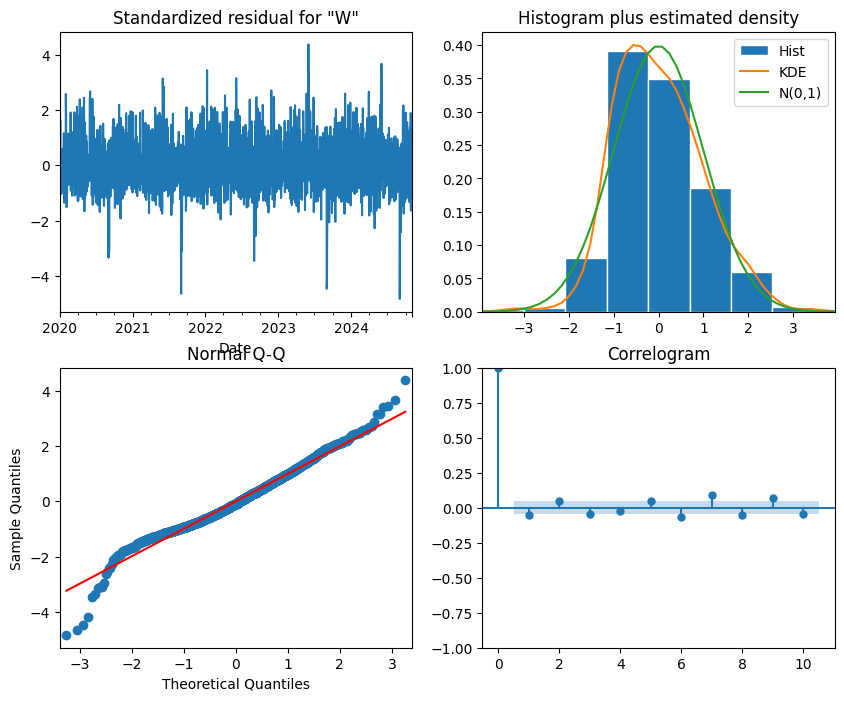

In [ ]:
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

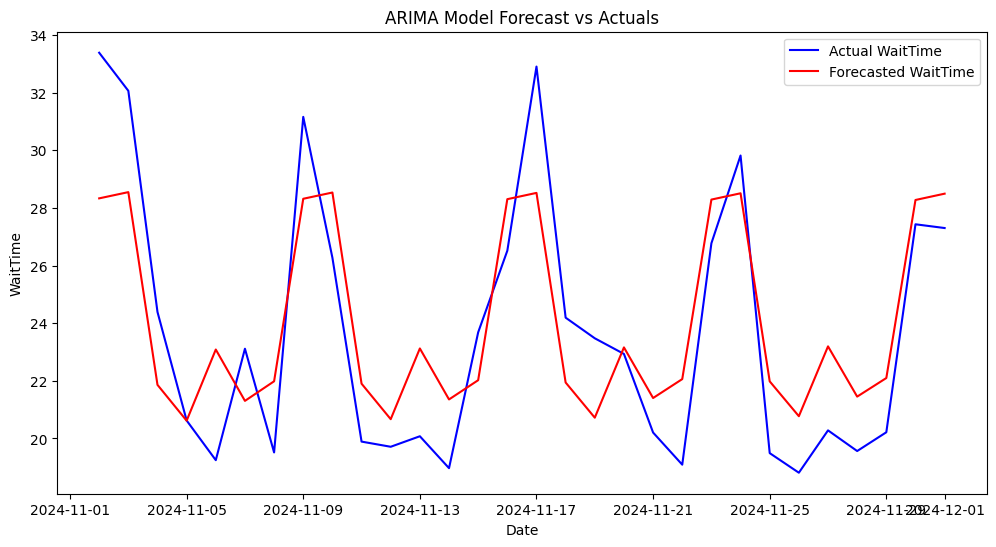

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual WaitTime', color='blue')
plt.plot(test.index, forecast, label='Forecasted WaitTime', color='red')
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('WaitTime')
plt.legend()
plt.show()


## Ensemble Model

In [ ]:
# Reserve the last 30 rows for testing
rf_test = data_filtered.tail(30)

# Extract the features for the test set
X_test_rf = rf_test.drop('WaitTime', axis=1)

X_test_rf_transformed = preprocessor.transform(X_test_rf)


In [ ]:
# Split the data into training and testing for ARIMA
arima_train = data_daily.iloc[:-30]  # All data except the last 30 days
arima_test = data_daily.iloc[-30:]  # Last 30 days


In [ ]:
# Random Forest Predictions
rf_predictions = rf_model.predict(X_test_rf_transformed)

# ARIMA Predictions
model = ARIMA(arima_train, order=(5, 0, 5))  # Replace order with your best parameters
model_fit = model.fit()
arima_predictions = model_fit.forecast(steps=30)  # Forecasting the next 30 days


In [ ]:
# Ensuring that ARIMA predictions are in the correct format for combining
arima_predictions_array = np.array(arima_predictions)

# Simple Average Ensemble
ensemble_predictions = (rf_predictions + arima_predictions_array) / 2


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

# Calculate Metrics
rmse = sqrt(mean_squared_error(rf_predictions, ensemble_predictions))
mae = mean_absolute_error(rf_predictions, ensemble_predictions)
r2 = r2_score(rf_predictions, ensemble_predictions)

# Print Metrics
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2)


RMSE:  7.8697901053616865
MAE:  6.430934468156098
R2:  0.7135907433586308
